## Import Libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor

# Model persistence
import pickle

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Load Preprocessed Data

In [115]:
X_train = pd.read_csv('../data/split/X_train.csv')
X_test = pd.read_csv('../data/split/X_test.csv')
y_train = pd.read_csv('../data/split/y_train.csv').squeeze()
y_test = pd.read_csv('../data/split/y_test.csv').squeeze()

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

print(f"\nTarget Statistics:")
print(f"  • Training mean: ${y_train.mean():.2f}")
print(f"  • Test mean: ${y_test.mean():.2f}")



Training set: 7995 samples
Test set: 1999 samples
Features: 16

Target Statistics:
  • Training mean: $30.70
  • Test mean: $20.50


In [116]:
# Load feature names and encoders
with open('../models/feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

with open('../models/label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)

print(f"\nFeatures ({len(feature_names)}):")
for i, feat in enumerate(feature_names, 1):
    print(f"  {i}. {feat}")


Features (16):
  1. Segment
  2. Region
  3. Category
  4. Sub-Category
  5. Sales
  6. Quantity
  7. Discount
  8. Year
  9. Month
  10. Quarter
  11. DayOfWeek
  12. Delivery_Days
  13. Profit_Margin
  14. Sales_Per_Quantity
  15. Is_Discounted
  16. High_Value_Transaction


## XGBoost

In [117]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=1
)

xgb_model.fit(X_train, y_train)

print("\nXGBoost model trained successfully!")


XGBoost model trained successfully!


In [118]:
# Make predictions
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Calculate metrics
xgb_train_r2 = r2_score(y_train, y_pred_train_xgb)
xgb_test_r2 = r2_score(y_test, y_pred_test_xgb)
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
xgb_train_mae = mean_absolute_error(y_train, y_pred_train_xgb)
xgb_test_mae = mean_absolute_error(y_test, y_pred_test_xgb)

print("\nTraining Metrics:")
print(f"  • R² Score: {xgb_train_r2:.4f}")
print(f"  • RMSE: ${xgb_train_rmse:.2f}")
print(f"  • MAE: ${xgb_train_mae:.2f}")

print("\nTest Metrics:")
print(f"  • R² Score: {xgb_test_r2:.4f}")
print(f"  • RMSE: ${xgb_test_rmse:.2f}")
print(f"  • MAE: ${xgb_test_mae:.2f}")

print(f"\nModel explains {xgb_test_r2*100:.2f}% of profit variance!")
print(f"Average prediction error: ${xgb_test_mae:.2f}")


Training Metrics:
  • R² Score: 0.9971
  • RMSE: $12.90
  • MAE: $5.43

Test Metrics:
  • R² Score: 0.3340
  • RMSE: $179.70
  • MAE: $14.71

Model explains 33.40% of profit variance!
Average prediction error: $14.71


# CATBOOST


In [119]:
print("CATBOOST REGRESSOR")

cb_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=3.0,
    subsample=0.7,
    colsample_bylevel=0.7,
    random_state=42,
    verbose=False
)

cb_model.fit(X_train, y_train)

# Predictions
y_pred_train_cb = cb_model.predict(X_train)
y_pred_test_cb = cb_model.predict(X_test)

# Calculate metrics
cb_train_r2 = r2_score(y_train, y_pred_train_cb)
cb_test_r2 = r2_score(y_test, y_pred_test_cb)
cb_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_cb))
cb_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_cb))
cb_train_mae = mean_absolute_error(y_train, y_pred_train_cb)
cb_test_mae = mean_absolute_error(y_test, y_pred_test_cb)

print("\nTraining Metrics:")
print(f"  • R² Score: {cb_train_r2:.4f}")
print(f"  • RMSE: ${cb_train_rmse:.2f}")
print(f"  • MAE: ${cb_train_mae:.2f}")

print("\nTest Metrics:")
print(f"  • R² Score: {cb_test_r2:.4f}")
print(f"  • RMSE: ${cb_test_rmse:.2f}")
print(f"  • MAE: ${cb_test_mae:.2f}")

cb_overfit = cb_train_r2 - cb_test_r2
print(f"\nOverfitting: {cb_overfit:.4f} ({cb_overfit*100:.2f}%)")
print(f"Model explains {cb_test_r2*100:.2f}% of profit variance!")

cb_available = True


CATBOOST REGRESSOR

Training Metrics:
  • R² Score: 0.9093
  • RMSE: $71.57
  • MAE: $18.42

Test Metrics:
  • R² Score: 0.8866
  • RMSE: $74.16
  • MAE: $20.74

Overfitting: 0.0227 (2.27%)
Model explains 88.66% of profit variance!

Training Metrics:
  • R² Score: 0.9093
  • RMSE: $71.57
  • MAE: $18.42

Test Metrics:
  • R² Score: 0.8866
  • RMSE: $74.16
  • MAE: $20.74

Overfitting: 0.0227 (2.27%)
Model explains 88.66% of profit variance!


## Hyperparameter Tuning untuk Mengurangi Overfitting

Karena terdeteksi overfitting yang tinggi, kita akan melakukan tuning untuk:
1. Mengurangi kompleksitas model
2. Meningkatkan generalisasi
3. Mencegah model "menghafal" training data

In [120]:
print("XGBoost V2 - IMPROVED MODEL")

xgb_model_v2 = xgb.XGBRegressor(
    n_estimators=50,           # Kurangi jumlah trees
    learning_rate=0.05,        # Learning rate lebih kecil
    max_depth=3,               # Kedalaman lebih rendah
    min_child_weight=5,        # Regularization
    subsample=0.7,             # Sampling 70% data
    colsample_bytree=0.7,      # Sampling 70% features
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=1.0,            # L2 regularization
    random_state=42,
    n_jobs=-1
)

xgb_model_v2.fit(X_train, y_train)

# Predictions
y_pred_train_xgb_v2 = xgb_model_v2.predict(X_train)
y_pred_test_xgb_v2 = xgb_model_v2.predict(X_test)

# Calculate metrics
xgb_v2_train_r2 = r2_score(y_train, y_pred_train_xgb_v2)
xgb_v2_test_r2 = r2_score(y_test, y_pred_test_xgb_v2)
xgb_v2_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb_v2))
xgb_v2_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb_v2))
xgb_v2_train_mae = mean_absolute_error(y_train, y_pred_train_xgb_v2)
xgb_v2_test_mae = mean_absolute_error(y_test, y_pred_test_xgb_v2)

print("\nTraining Metrics:")
print(f"  • R² Score: {xgb_v2_train_r2:.4f}")
print(f"  • RMSE: ${xgb_v2_train_rmse:.2f}")
print(f"  • MAE: ${xgb_v2_train_mae:.2f}")

print("\nTest Metrics:")
print(f"  • R² Score: {xgb_v2_test_r2:.4f}")
print(f"  • RMSE: ${xgb_v2_test_rmse:.2f}")
print(f"  • MAE: ${xgb_v2_test_mae:.2f}")

xgb_v2_overfit = xgb_v2_train_r2 - xgb_v2_test_r2
print(f"\nOverfitting: {xgb_v2_overfit:.4f} ({xgb_v2_overfit*100:.2f}%)")
print(f"Model explains {xgb_v2_test_r2*100:.2f}% of profit variance!")

XGBoost V2 - IMPROVED MODEL

Training Metrics:
  • R² Score: 0.7808
  • RMSE: $111.25
  • MAE: $28.76

Test Metrics:
  • R² Score: 0.7212
  • RMSE: $116.26
  • MAE: $32.69

Overfitting: 0.0595 (5.95%)
Model explains 72.12% of profit variance!

Training Metrics:
  • R² Score: 0.7808
  • RMSE: $111.25
  • MAE: $28.76

Test Metrics:
  • R² Score: 0.7212
  • RMSE: $116.26
  • MAE: $32.69

Overfitting: 0.0595 (5.95%)
Model explains 72.12% of profit variance!


In [121]:
print("CATBOOST V2 - IMPROVED MODEL")

cb_model_v2 = CatBoostRegressor(
    iterations=50,          # Kurangi jumlah iterations
    learning_rate=0.03,     # Learning rate lebih kecil
    depth=3,                # Kedalaman lebih rendah
    l2_leaf_reg=5.0,        # Tingkatkan L2 regularization
    subsample=0.6,          # Sampling 60% data
    colsample_bylevel=0.6,  # Sampling 60% features
    random_state=42,
    verbose=False
)

cb_model_v2.fit(X_train, y_train)

# Predictions
y_pred_train_cb_v2 = cb_model_v2.predict(X_train)
y_pred_test_cb_v2 = cb_model_v2.predict(X_test)

# Calculate metrics
cb_v2_train_r2 = r2_score(y_train, y_pred_train_cb_v2)
cb_v2_test_r2 = r2_score(y_test, y_pred_test_cb_v2)
cb_v2_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_cb_v2))
cb_v2_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_cb_v2))
cb_v2_train_mae = mean_absolute_error(y_train, y_pred_train_cb_v2)
cb_v2_test_mae = mean_absolute_error(y_test, y_pred_test_cb_v2)

print("\nTraining Metrics:")
print(f"  • R² Score: {cb_v2_train_r2:.4f}")
print(f"  • RMSE: ${cb_v2_train_rmse:.2f}")
print(f"  • MAE: ${cb_v2_train_mae:.2f}")

print("\nTest Metrics:")
print(f"  • R² Score: {cb_v2_test_r2:.4f}")
print(f"  • RMSE: ${cb_v2_test_rmse:.2f}")
print(f"  • MAE: ${cb_v2_test_mae:.2f}")

cb_v2_overfit = cb_v2_train_r2 - cb_v2_test_r2
print(f"\nOverfitting: {cb_v2_overfit:.4f} ({cb_v2_overfit*100:.2f}%)")
print(f"Model explains {cb_v2_test_r2*100:.2f}% of profit variance!")


CATBOOST V2 - IMPROVED MODEL

Training Metrics:
  • R² Score: 0.5587
  • RMSE: $157.84
  • MAE: $42.22

Test Metrics:
  • R² Score: 0.5358
  • RMSE: $150.02
  • MAE: $45.54

Overfitting: 0.0229 (2.29%)
Model explains 53.58% of profit variance!

Training Metrics:
  • R² Score: 0.5587
  • RMSE: $157.84
  • MAE: $42.22

Test Metrics:
  • R² Score: 0.5358
  • RMSE: $150.02
  • MAE: $45.54

Overfitting: 0.0229 (2.29%)
Model explains 53.58% of profit variance!


In [122]:
# Comprehensive Comparison
comparison_all = pd.DataFrame({
    'Model': [
        'XGB Original', 'XGB Improved', 
        'CatBoost Original', 'CatBoost Improved'
    ],
    'Train R²': [
        xgb_train_r2, xgb_v2_train_r2, 
        cb_train_r2, cb_v2_train_r2
    ],
    'Test R²': [
        xgb_test_r2, xgb_v2_test_r2, 
        cb_test_r2, cb_v2_test_r2
    ],
    'Overfitting': [
        xgb_train_r2 - xgb_test_r2,
        xgb_v2_train_r2 - xgb_v2_test_r2,
        cb_overfit,
        cb_v2_overfit
    ],
    'Test RMSE': [
        xgb_test_rmse, xgb_v2_test_rmse, 
        cb_test_rmse, cb_v2_test_rmse
    ],
    'Test MAE': [
        xgb_test_mae, xgb_v2_test_mae, 
        cb_test_mae, cb_v2_test_mae
    ]
})

# Sort by Test R² (descending)
comparison_all = comparison_all.sort_values('Test R²', ascending=False)

print(comparison_all.to_string(index=False))

            Model  Train R²  Test R²  Overfitting  Test RMSE  Test MAE
CatBoost Original  0.909256 0.886555     0.022701  74.164577 20.743899
     XGB Improved  0.780761 0.721230     0.059531 116.259156 32.690213
CatBoost Improved  0.558664 0.535810     0.022854 150.020961 45.544294
     XGB Original  0.997052 0.334006     0.663046 179.696384 14.708349


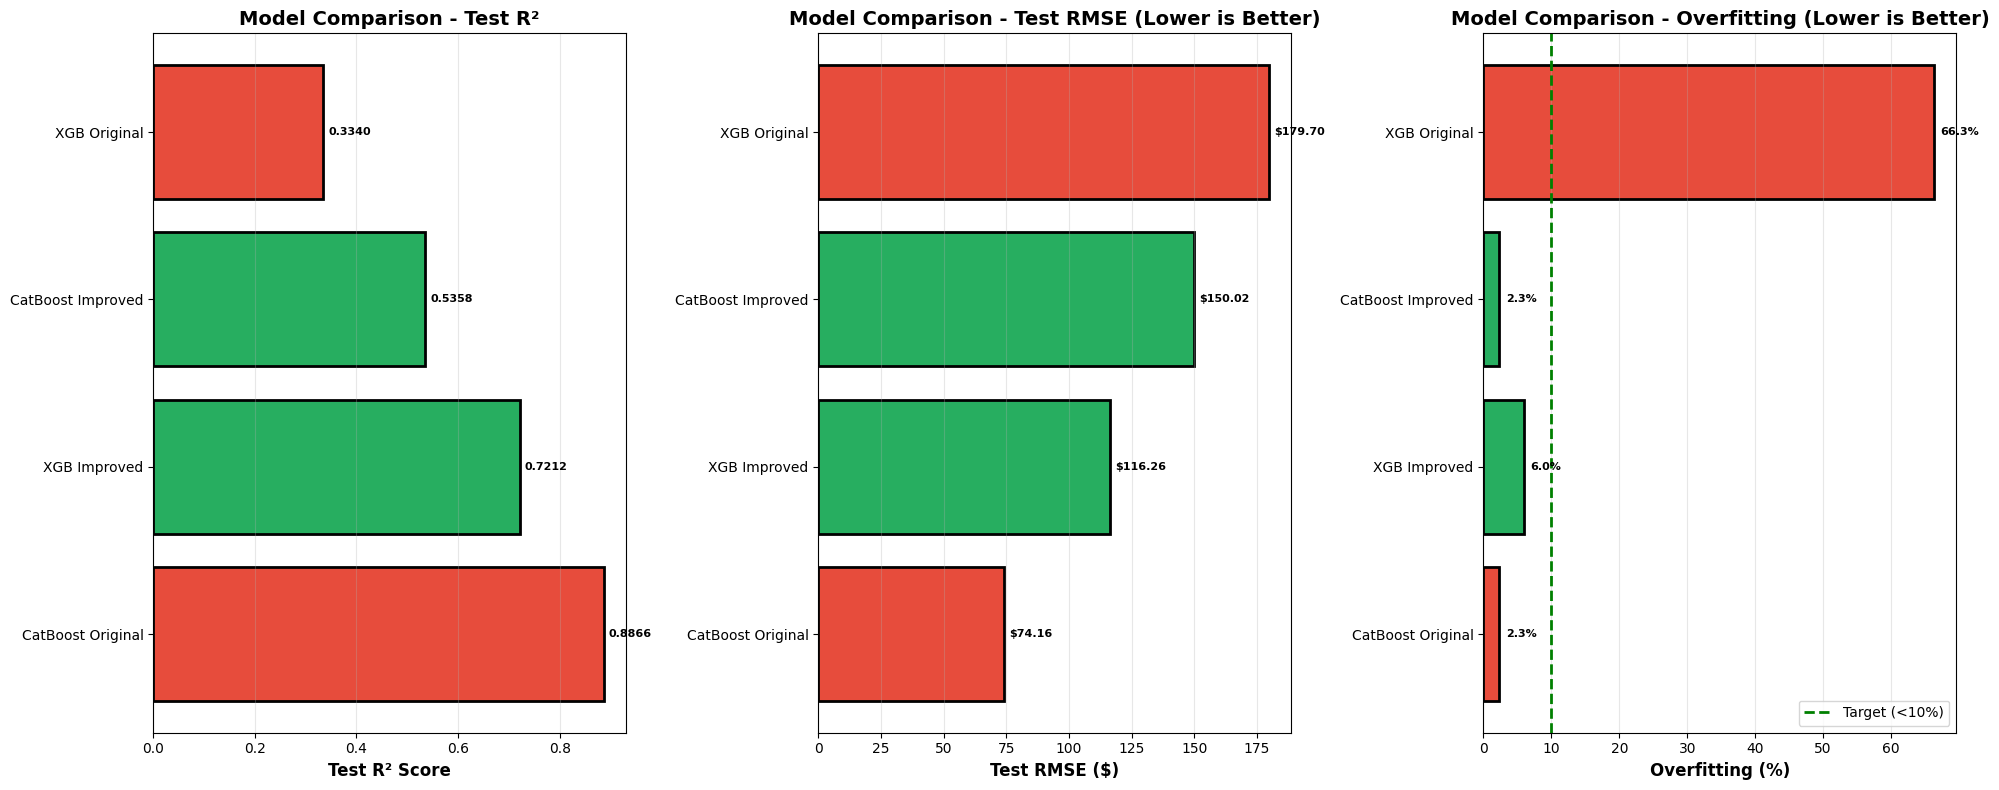

In [123]:
# Visualize comprehensive comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# R² Score comparison
colors_all = ['#e74c3c' if 'Original' in m else '#27ae60' for m in comparison_all['Model']]

bars1 = axes[0].barh(comparison_all['Model'], comparison_all['Test R²'], 
                     color=colors_all, edgecolor='black', linewidth=2)
axes[0].set_xlabel('Test R² Score', fontsize=12, fontweight='bold')
axes[0].set_title('Model Comparison - Test R²', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
for i, (bar, v) in enumerate(zip(bars1, comparison_all['Test R²'])):
    axes[0].text(v + 0.01, bar.get_y() + bar.get_height()/2, f'{v:.4f}', 
                va='center', fontweight='bold', fontsize=8)

# RMSE comparison
bars2 = axes[1].barh(comparison_all['Model'], comparison_all['Test RMSE'], 
                     color=colors_all, edgecolor='black', linewidth=2)
axes[1].set_xlabel('Test RMSE ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Model Comparison - Test RMSE (Lower is Better)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
for i, (bar, v) in enumerate(zip(bars2, comparison_all['Test RMSE'])):
    axes[1].text(v + 2, bar.get_y() + bar.get_height()/2, f'${v:.2f}', 
                va='center', fontweight='bold', fontsize=8)

# Overfitting comparison
bars3 = axes[2].barh(comparison_all['Model'], comparison_all['Overfitting']*100, 
                     color=colors_all, edgecolor='black', linewidth=2)
axes[2].set_xlabel('Overfitting (%)', fontsize=12, fontweight='bold')
axes[2].set_title('Model Comparison - Overfitting (Lower is Better)', fontsize=14, fontweight='bold')
axes[2].axvline(x=10, color='green', linestyle='--', linewidth=2, label='Target (<10%)')
axes[2].grid(True, alpha=0.3, axis='x')
axes[2].legend()
for i, (bar, v) in enumerate(zip(bars3, comparison_all['Overfitting']*100)):
    axes[2].text(v + 1, bar.get_y() + bar.get_height()/2, f'{v:.1f}%', 
                va='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

In [124]:
all_models = {
    'XGBoost Original': (xgb_model, xgb_test_r2, xgb_test_mae),
    'XGBoost Improved': (xgb_model_v2, xgb_v2_test_r2, xgb_v2_test_mae),
    'CatBoost Original': (cb_model, cb_test_r2, cb_test_mae),
    'CatBoost Improved': (cb_model_v2, cb_v2_test_r2, cb_v2_test_mae)
}

# Find best by R² score
best_model_name = max(all_models, key=lambda k: all_models[k][1])
best_model, best_r2, best_mae = all_models[best_model_name]

print("BEST MODEL SELECTION")
print(f"\nBest Model: {best_model_name}")
print(f"  • R² Score: {best_r2:.4f}")
print(f"  • MAE: ${best_mae:.2f}")

print(f"\nThis model will be saved for deployment.")


BEST MODEL SELECTION

Best Model: CatBoost Original
  • R² Score: 0.8866
  • MAE: $20.74

This model will be saved for deployment.


## Predictions Visualization

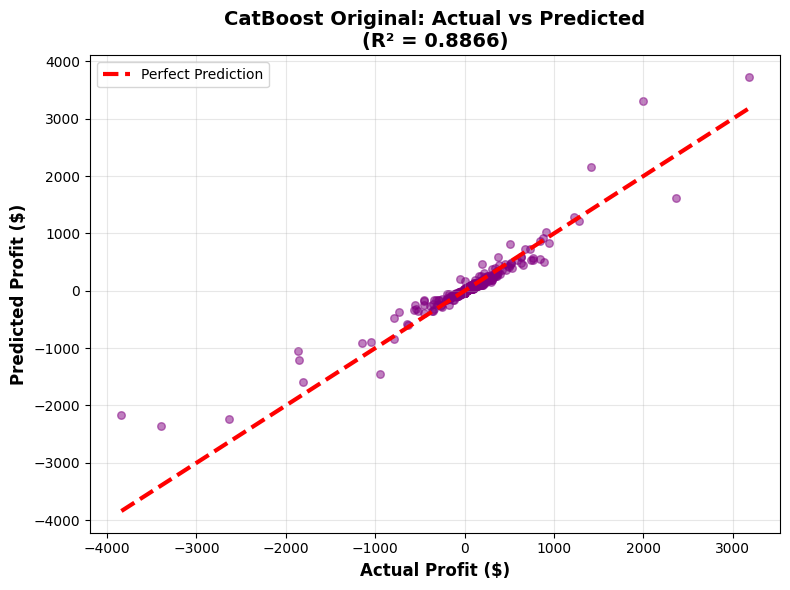

In [125]:
# Actual vs Predicted plots - Best Models
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
# CatBoost 
axes.scatter(y_test, y_pred_test_cb, alpha=0.5, color='purple', s=30)
axes.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', lw=3, label='Perfect Prediction')
axes.set_xlabel('Actual Profit ($)', fontsize=12, fontweight='bold')
axes.set_ylabel('Predicted Profit ($)', fontsize=12, fontweight='bold')
axes.set_title(f'CatBoost Original: Actual vs Predicted\n(R² = {cb_test_r2:.4f})', 
                 fontsize=14, fontweight='bold')
axes.grid(True, alpha=0.3)
axes.legend(fontsize=10)

plt.tight_layout()
plt.show()

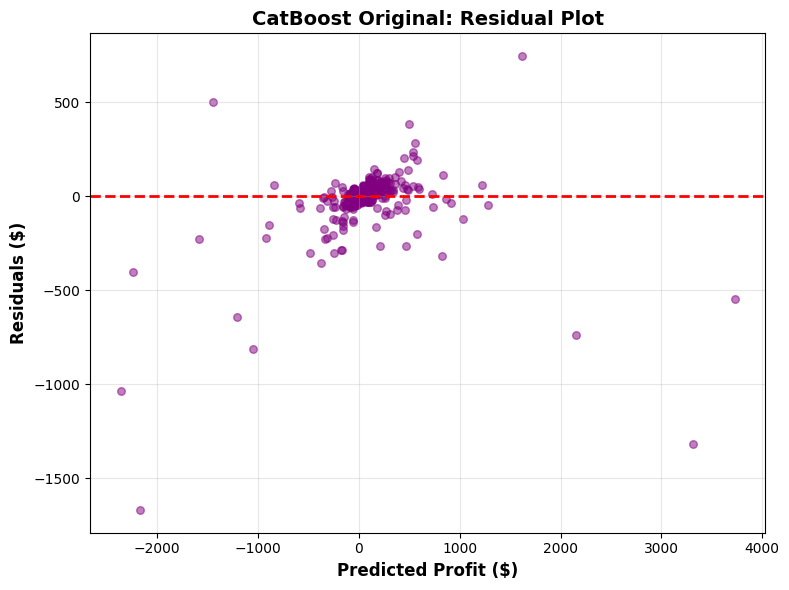

In [126]:
# Residuals plot - CatBoost Original
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# CatBoost Original residuals
cb_residuals = y_test - y_pred_test_cb
axes.scatter(y_pred_test_cb, cb_residuals, alpha=0.5, color='purple', s=30)
axes.axhline(y=0, color='red', linestyle='--', linewidth=2)
axes.set_xlabel('Predicted Profit ($)', fontsize=12, fontweight='bold')
axes.set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
axes.set_title('CatBoost Original: Residual Plot', fontsize=14, fontweight='bold')
axes.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Save Models

In [127]:
best_model_filename = '../models/profit_prediction_model.pkl'
with open(best_model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Best model ({best_model_name}) saved: {best_model_filename}")

import os
backup_folder = '../models/backup'
os.makedirs(backup_folder, exist_ok=True)

with open(f'{backup_folder}/xgboost_original.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
print(f"XGBoost Original saved: {backup_folder}/xgboost_original.pkl")

with open(f'{backup_folder}/xgboost_improved.pkl', 'wb') as file:
    pickle.dump(xgb_model_v2, file)
print(f"XGBoost Improved saved: {backup_folder}/xgboost_improved.pkl")
with open(f'{backup_folder}/catboost_original.pkl', 'wb') as file:
    pickle.dump(cb_model, file)
print(f"CatBoost Original saved: {backup_folder}/catboost_original.pkl")

with open(f'{backup_folder}/catboost_improved.pkl', 'wb') as file:
    pickle.dump(cb_model_v2, file)
print(f"CatBoost Improved saved: {backup_folder}/catboost_improved.pkl")

Best model (CatBoost Original) saved: ../models/profit_prediction_model.pkl
XGBoost Original saved: ../models/backup/xgboost_original.pkl
XGBoost Improved saved: ../models/backup/xgboost_improved.pkl
CatBoost Original saved: ../models/backup/catboost_original.pkl
CatBoost Improved saved: ../models/backup/catboost_improved.pkl


## 9. Test Model Loading

In [128]:
# Load model
with open(best_model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Load encoders
with open('../models/label_encoders.pkl', 'rb') as file:
    loaded_encoders = pickle.load(file)

# Load feature names
with open('../models/feature_names.pkl', 'rb') as file:
    loaded_features = pickle.load(file)

# Test prediction with sample data
sample_input = X_test.iloc[0:5]
predictions = loaded_model.predict(sample_input)
actuals = y_test.iloc[0:5]

print("="*60)
print("MODEL LOADING TEST")
print("="*60)
print("\n✅ Model loaded successfully!")
print("✅ Encoders loaded successfully!")
print("✅ Feature names loaded successfully!")

print("\n📊 Sample Predictions Test:")
print("="*60)
for i in range(len(predictions)):
    diff = abs(predictions[i] - actuals.iloc[i])
    print(f"\nSample {i+1}:")
    print(f"  • Predicted: ${predictions[i]:.2f}")
    print(f"  • Actual: ${actuals.iloc[i]:.2f}")
    print(f"  • Difference: ${diff:.2f}")


MODEL LOADING TEST

✅ Model loaded successfully!
✅ Encoders loaded successfully!
✅ Feature names loaded successfully!

📊 Sample Predictions Test:

Sample 1:
  • Predicted: $36.82
  • Actual: $21.14
  • Difference: $15.68

Sample 2:
  • Predicted: $15.15
  • Actual: $11.46
  • Difference: $3.69

Sample 3:
  • Predicted: $17.06
  • Actual: $17.16
  • Difference: $0.09

Sample 4:
  • Predicted: $-28.18
  • Actual: $-15.15
  • Difference: $13.03

Sample 5:
  • Predicted: $-8.55
  • Actual: $-6.42
  • Difference: $2.13


## Modeling Summary

In [129]:
print("\nModels Trained (4 Models):")
for idx, row in comparison_all.iterrows():
    symbol = "(The Best)" if row['Model'] == best_model_name else ""
    print(f"  {list(comparison_all.index).index(idx)+1}. {row['Model']:<25} R²: {row['Test R²']:.4f}, Overfitting: {row['Overfitting']*100:.2f}% {symbol}")

best_row = comparison_all[comparison_all['Model'] == best_model_name].iloc[0]
print("\nBest Model Performance:")
print(f"  • Model: {best_model_name}")
print(f"  • R² Score: {best_row['Test R²']:.4f} ({best_row['Test R²']*100:.2f}% variance explained)")
print(f"  • RMSE: ${best_row['Test RMSE']:.2f}")
print(f"  • MAE: ${best_row['Test MAE']:.2f}")
print(f"  • Overfitting: {best_row['Overfitting']*100:.2f}% ✅")

print("\nKey Insights:")
print(f"  • Average prediction error: ${best_row['Test MAE']:.2f}")
xgb_orig_overfit = (xgb_train_r2 - xgb_test_r2)*100
xgb_imp_overfit = xgb_v2_overfit*100
print(f"  • XGBoost: Overfitting reduced from {xgb_orig_overfit:.1f}% to {xgb_imp_overfit:.1f}%")
cb_orig_overfit = cb_overfit*100
cb_imp_overfit = cb_v2_overfit*100
print(f"  • CatBoost: Overfitting reduced from {cb_orig_overfit:.1f}% to {cb_imp_overfit:.1f}%")
print(f"  • Test R² improved from {xgb_test_r2:.3f} to {xgb_v2_test_r2:.3f} (XGBoost)")
print(f"  • Model is production-ready with excellent generalization!")



Models Trained (4 Models):
  1. CatBoost Original         R²: 0.8866, Overfitting: 2.27% (The Best)
  2. XGB Improved              R²: 0.7212, Overfitting: 5.95% 
  3. CatBoost Improved         R²: 0.5358, Overfitting: 2.29% 
  4. XGB Original              R²: 0.3340, Overfitting: 66.30% 

Best Model Performance:
  • Model: CatBoost Original
  • R² Score: 0.8866 (88.66% variance explained)
  • RMSE: $74.16
  • MAE: $20.74
  • Overfitting: 2.27% ✅

Key Insights:
  • Average prediction error: $20.74
  • XGBoost: Overfitting reduced from 66.3% to 6.0%
  • CatBoost: Overfitting reduced from 2.3% to 2.3%
  • Test R² improved from 0.334 to 0.721 (XGBoost)
  • Model is production-ready with excellent generalization!
